In [87]:
# Librerías necesarias
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None) #Metodo uno para ver todas las columnas
pd.options.display.float_format = '{:.6f}'.format #para eliminar notacion cientifica

# listings

In [91]:
df = pd.read_csv('../data/listings_summary.csv')


In [93]:
df.shape

(67942, 23)

In [92]:
df.head(2)

,id,listing_url,accommodates,bedrooms,beds,host_acceptance_rate,host_is_superhost,host_response_rate,host_response_time,latitude,longitude,name,neighbourhood,number_of_reviews,price,property_type,reviews_per_month,room_type,source,average_score,months_since_first_review,description_clean,neighborhood_overview_clean
0,52931,https://www.airbnb.com/rooms/52931,4,2.000000,2.000000,0.970000,False,0.960000,within an hour,48.896130,2.327460,Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...,"Paris, Île-de-France, France",17,209.000000,Entire rental unit,1.650000,Entire home/apt,previous scrape,4.510000,10.000000,I will be delighted to welcome you to my charm...,"In some streets, Les Épinettes has also become..."
1,53353,https://www.airbnb.com/rooms/53353,6,2.000000,3.000000,NaN,False,NaN,NaN,48.889850,2.350660,Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...,"Paris, Île-de-France, France",37,297.000000,Entire rental unit,0.240000,Entire home/apt,city scrape,4.800000,155.000000,A 100 m2 Loft/apartment (with 20 m2 terrace) o...,NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...


In [94]:
df.columns

Index(['id', 'listing_url', 'accommodates', 'bedrooms', 'beds',
       'host_acceptance_rate', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'price', 'property_type', 'reviews_per_month',
       'room_type', 'source', 'average_score', 'months_since_first_review',
       'description_clean', 'neighborhood_overview_clean'],
      dtype='object')

In [95]:
df.duplicated().sum()

0

In [96]:
df.describe()

,id,accommodates,bedrooms,beds,host_acceptance_rate,host_response_rate,latitude,longitude,number_of_reviews,price,reviews_per_month,average_score,months_since_first_review
count,67942.000000,67942.000000,67942.000000,67942.000000,45676.000000,42044.000000,67942.000000,67942.000000,67942.000000,67942.000000,53185.000000,53185.000000,53185.000000
mean,331038944891930048.000000,3.078390,1.358541,1.717450,0.817697,0.925584,48.864335,2.344107,23.839481,205.105914,1.122653,4.672807,41.709448
std,405115832660481024.000000,1.609463,0.894683,1.253581,0.263218,0.188858,0.018170,0.033749,54.006635,482.048444,1.443892,0.568708,35.598840
min,3109.000000,1.000000,1.000000,1.000000,0.000000,0.000000,48.816080,2.224640,0.000000,8.000000,0.010000,0.000000,0.000000
25%,19999793.250000,2.000000,1.000000,1.000000,0.730000,0.970000,48.851230,2.322780,1.000000,80.000000,0.190000,4.630000,9.000000
50%,45083541.500000,2.000000,1.000000,1.000000,0.960000,1.000000,48.865606,2.347470,6.000000,125.000000,0.630000,4.810000,33.000000
75%,781649918085354880.000000,4.000000,2.000000,2.000000,1.000000,1.000000,48.879010,2.369000,23.000000,209.000000,1.540000,4.910000,70.000000
max,973172494919121792.000000,16.000000,50.000000,90.000000,1.000000,1.000000,48.901670,2.467120,2580.000000,63594.000000,61.550000,5.000000,171.000000


In [42]:
df['price'].isnull().sum()

0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           67942 non-null  int64  
 1   listing_url                  67942 non-null  object 
 2   accommodates                 67942 non-null  int64  
 3   bedrooms                     67942 non-null  float64
 4   beds                         67942 non-null  float64
 5   host_acceptance_rate         45676 non-null  float64
 6   host_is_superhost            66968 non-null  object 
 7   host_response_rate           42044 non-null  float64
 8   host_response_time           42044 non-null  object 
 9   latitude                     67942 non-null  float64
 10  longitude                    67942 non-null  float64
 11  name                         67942 non-null  object 
 12  neighbourhood                38031 non-null  object 
 13  number_of_review

In [179]:
df['source'].value_counts(dropna=False)

source
city scrape        41360
previous scrape    26582
Name: count, dtype: int64

## Average Score by Room Type

C:\Users\eusou\AppData\Local\Temp\ipykernel_20120\2621450694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c.index, y=c.values, palette=colors, ax=ax1)


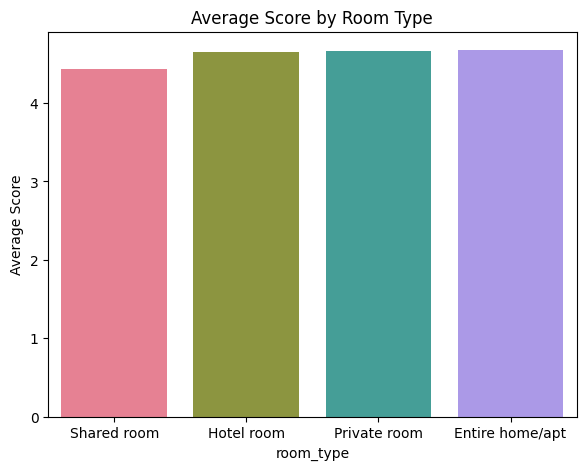

In [212]:

c = df.groupby('room_type')['average_score'].mean().sort_values(ascending=True).head(10)

colors = sns.color_palette('husl', len(c))

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
sns.barplot(x=c.index, y=c.values, palette=colors, ax=ax1)  
ax1.set_title('Average Score by Room Type')
plt.ylabel('Average Score')
plt.show()

### Room Type Distribution

In [99]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [149]:
room_stats = df.groupby('room_type')['room_type'].agg('count').sort_values(ascending = False)

In [151]:
l = [i for i in room_stats.index]
l

['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

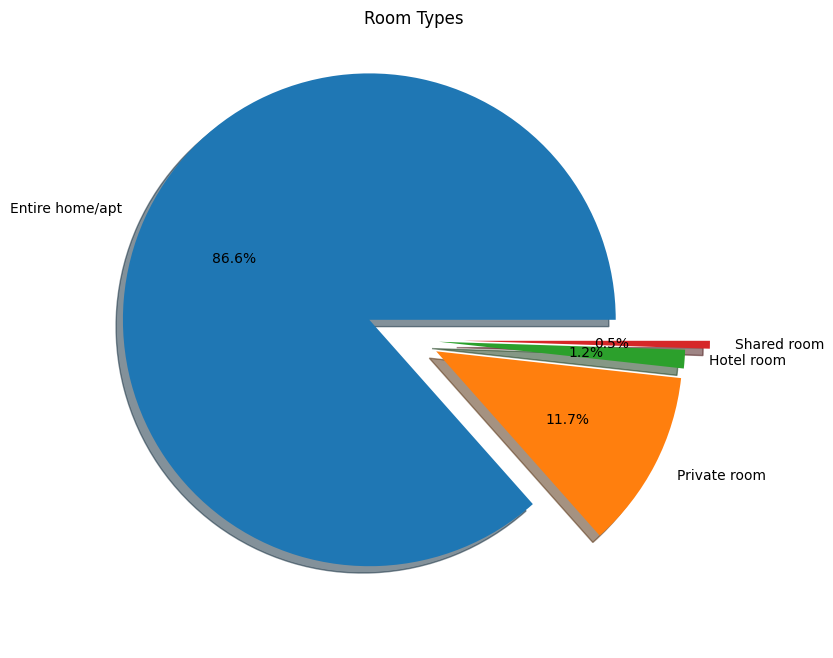

In [154]:
def func(x, room_stats):
    #pct = (x*100)/room_stats.sum()
    return "{:.1f}%".format(x)
    
fig = plt.figure(figsize = (8, 8))
plt.pie(room_stats,
        labels = l,
        autopct = lambda pct: func(pct, room_stats),
        explode = [0.2, 0.1, 0.1, 0.2],
        shadow = True)
plt.title('Room Types')
plt.show()

## Accommodates

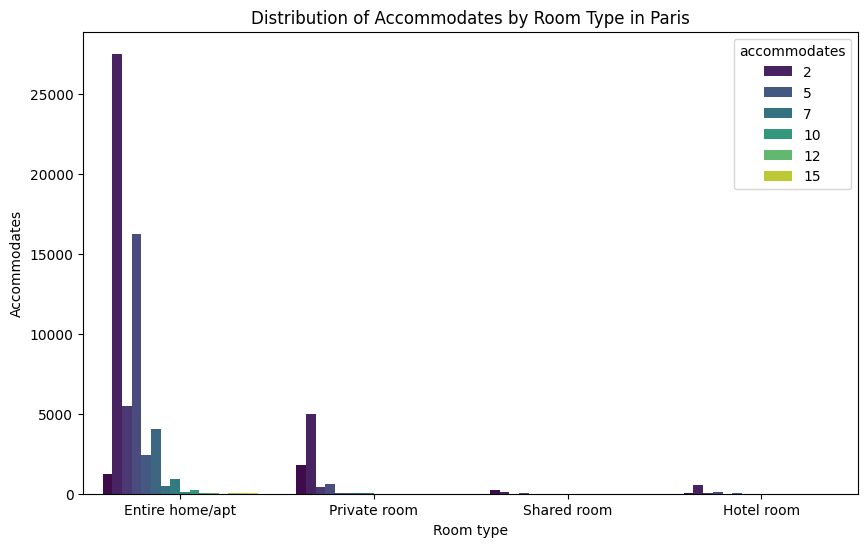

In [225]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', hue='accommodates', palette='viridis')
plt.title('Distribution of Accommodates by Room Type in Paris')
plt.xlabel('Room type')
plt.ylabel('Accommodates')
plt.show()


En la gráfica se aprecia que el número más común de personas para los diversos tipos de habitación es de dos, siendo importante tener en cuenta que 'Entire home/apt' tiene una capacidad máxima de hasta 15 personas. Esta información resulta útil para los huéspedes al seleccionar un lugar para alojarse

### Price Distribution in Each Room Type

C:\Users\eusou\AppData\Local\Temp\ipykernel_20120\261637105.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='price', y='room_type', order=sorted_room_types, palette='GnBu_d')


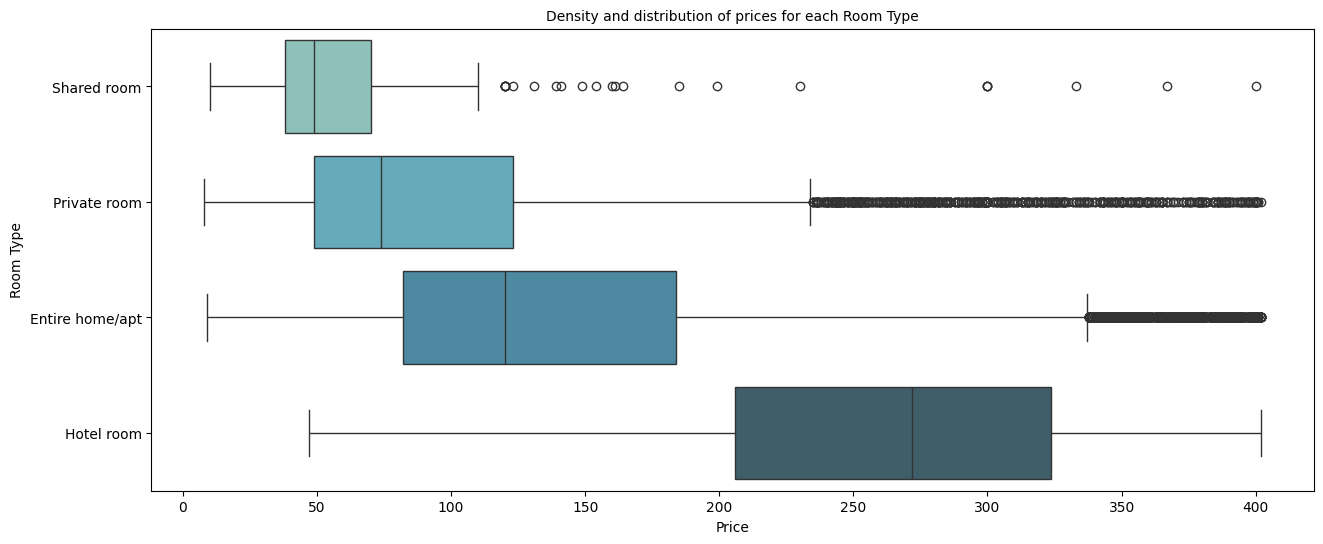

In [178]:



# Calcular el rango intercuartílico (IQR) para la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores no atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para incluir solo valores no atípicos
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calcular la media de 'price' para cada 'room_type'
room_type_means = df_filtered.groupby('room_type')['price'].mean()

# Ordenar 'room_type' según la media de 'price' de menor a mayor
sorted_room_types = room_type_means.sort_values().index

# Crear un gráfico de caja (boxplot) con valores no atípicos, ordenando 'room_type'
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_filtered, x='price', y='room_type', order=sorted_room_types, palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=10)
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.show()



En el gráfico #2, se destaca que la categoría 'Shared room' presenta el precio más bajo entre los tipos de habitación, aunque con una variabilidad notable. En contraste, 'Hotel room' exhibe la media de precios más alta con una variabilidad más baja.
